In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


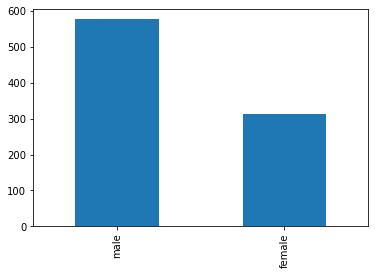

In [5]:
df.Sex.value_counts().plot(kind = 'bar');

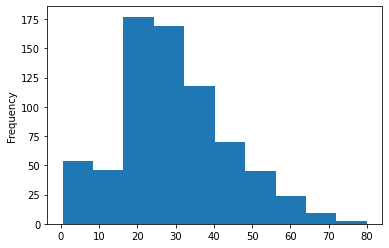

In [6]:
df.Age.plot(kind = 'hist');

In [7]:
# positive skew -> median imputation
val = df['Age'].median()
df['Age'] = df['Age'].fillna(val)

In [8]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
B79            1
D45            1
B42            1
B101           1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [9]:
# cabin var is not significant for this problem
# so we drop it
df.drop('Cabin', axis=1, inplace=True)

In [10]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# embarked is categorical col
val = df.Embarked.mode()
df['Embarked'] = df['Embarked'].fillna(val)

In [12]:
df['Alone'] = df['Parch'] + df['SibSp']

In [13]:
df['Alone'][df['Alone'] > 0] = 'With Family'
df['Alone'][df['Alone'] == 0] = 'Without Family'

<ipython-input-13-762b00684f87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'][df['Alone'] > 0] = 'With Family'
<ipython-input-13-762b00684f87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'][df['Alone'] == 0] = 'Without Family'


In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


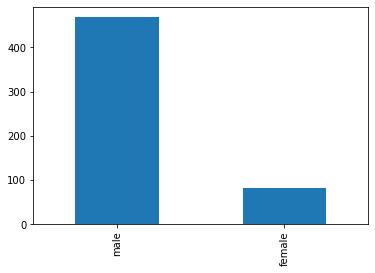

In [15]:
df.Sex[df.Survived == 0].value_counts().plot(kind = 'bar');

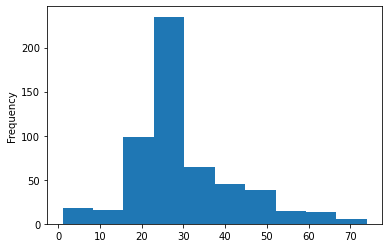

In [16]:
df.Age[df.Survived == 0].plot(kind = 'hist');

In [17]:
df[['Survived', 'Age', 'Embarked']].head()

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S


In [18]:
def make_pivot(param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)
    p_chart = slice_pivot.plot(kind = 'bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
        return slice_pivot
        return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

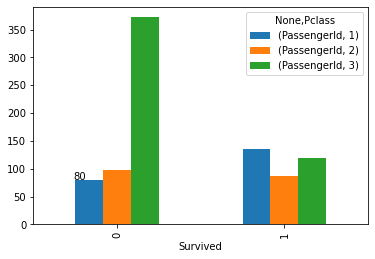

In [19]:
make_pivot('Survived', 'Pclass')

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  217

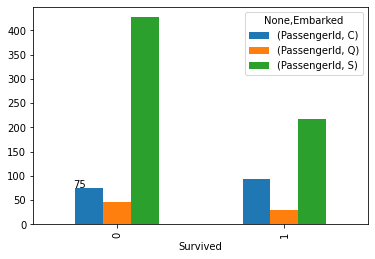

In [20]:
make_pivot('Survived', 'Embarked')

In [21]:
dataset = pd.read_csv('data-rekap-kasus-covid19.csv')
dataset.head()

,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
0,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,4534,308,4226,3315,608,2707,623,170,29,5,419,NaN
1,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,6570,449,6121,2248,313,1935,1447,413,512,72,450,NaN
2,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,131,0,131,63,3,60,51,11,33,4,3,NaN
3,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,6,0,6,13,0,13,17,0,16,0,1,NaN
4,3173051001,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,KEBON JERUK,423,2,421,45,1,44,55,13,22,7,13,NaN


In [22]:
# hitung per kota
dataset.groupby(['nama_kota']).sum()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
nama_kota,,,,,,,,,,,,
BELUM DIKETAHUI,4534,308,4226,3315,608,2707,623,170,29,5,419,0.0
JAKARTA BARAT,4534,62,4472,1173,116,1057,1170,271,393,88,418,0.0
JAKARTA PUSAT,4123,55,4068,1030,60,970,980,233,268,77,402,0.0
JAKARTA SELATAN,4264,43,4221,1213,53,1160,925,203,392,104,226,0.0
JAKARTA TIMUR,4352,58,4294,956,54,902,1211,287,420,105,399,0.0
JAKARTA UTARA,5329,82,5247,1041,64,977,1013,214,226,70,503,0.0
KAB.ADM.KEP.SERIBU,465,1,464,19,0,19,14,3,6,0,5,0.0
LUAR DKI JAKARTA,6570,449,6121,2248,313,1935,1447,413,512,72,450,0.0


In [23]:
# hitung per kota 4524
dataset.groupby(['nama_kota'])['odp'].sum()

nama_kota
BELUM DIKETAHUI       4534
JAKARTA BARAT         4534
JAKARTA PUSAT         4123
JAKARTA SELATAN       4264
JAKARTA TIMUR         4352
JAKARTA UTARA         5329
KAB.ADM.KEP.SERIBU     465
LUAR DKI JAKARTA      6570
Name: odp, dtype: int64

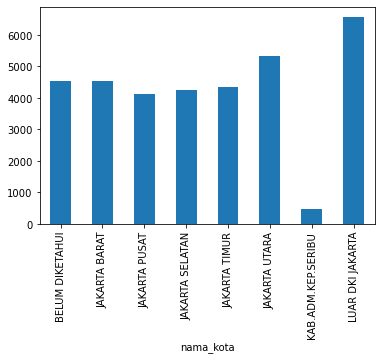

In [24]:
dataset.groupby(['nama_kota'])['odp'].sum().plot(kind = 'bar');

In [77]:
data_sekolah = pd.read_csv('jumlah-sekolah-sd-di-dki-jakarta-per-kecamatan.csv')
data_guru = pd.read_csv('jumlah-guru-sd-di-dki-jakarta-per-kecamatan.csv')

In [78]:
data_sekolah.head()

,kabkota,kecamatan,negeri,swasta
0,Jakarta Pusat,Tanah Abang,33,12
1,Jakarta Pusat,Menteng,17,13
2,Jakarta Pusat,Senen,39,12
3,Jakarta Pusat,Johar Baru,35,5
4,Jakarta Pusat,Cempaka Putih,25,9


In [79]:
data_guru.head()

,kabkota,kecamatan,negeri,swasta
0,Jakarta Pusat,Tanah Abang,419,142
1,Jakarta Pusat,Menteng,222,203
2,Jakarta Pusat,Senen,385,159
3,Jakarta Pusat,Johar Baru,384,60
4,Jakarta Pusat,Cempaka Putih,315,105


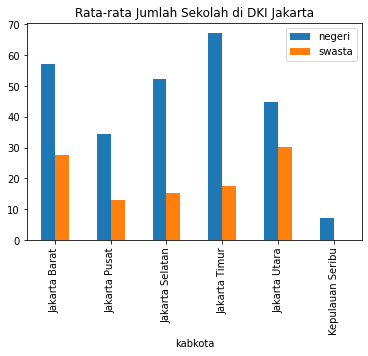

In [80]:
data_sekolah.groupby(['kabkota']).mean().plot(kind = 'bar');
plt.title('Rata-rata Jumlah Sekolah di DKI Jakarta');

In [81]:
data_guru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kabkota    44 non-null     object
 1   kecamatan  44 non-null     object
 2   negeri     44 non-null     object
 3   swasta     44 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


In [82]:
data_guru.negeri

0       419
1       222
2       385
3       384
4       315
5       856
6       263
7       323
8       485
9       339
10      765
11      925
12      229
13      875
14      813
15      852
16      683
17      510
18      408
19      288
20    1,192
21      980
22      966
23      732
24      652
25      781
26      979
27      474
28      372
29      484
30      750
31      378
32      825
33      914
34      793
35      686
36      881
37      870
38    1,365
39    1,275
40      830
41      548
42       94
43      113
Name: negeri, dtype: object

In [83]:
data_sekolah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kabkota    44 non-null     object
 1   kecamatan  44 non-null     object
 2   negeri     44 non-null     int64 
 3   swasta     44 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ KB


In [84]:
data_guru.negeri = data_guru.negeri.apply(lambda x : x.replace(',',''))
data_guru.negeri = data_guru.negeri.astype('int64')

In [85]:
data_sekolah.columns = ['kabkota', 'kecamatan', 'sekolah_negeri', 'sekolah_swasta']
data_guru.columns = ['kabkota', 'kecamatan', 'guru_negeri', 'guru_swasta']

In [86]:
data_sekolah.head()

,kabkota,kecamatan,sekolah_negeri,sekolah_swasta
0,Jakarta Pusat,Tanah Abang,33,12
1,Jakarta Pusat,Menteng,17,13
2,Jakarta Pusat,Senen,39,12
3,Jakarta Pusat,Johar Baru,35,5
4,Jakarta Pusat,Cempaka Putih,25,9


In [87]:
data_guru['sekolah_negeri'] = data_sekolah['sekolah_negeri']
data_guru['sekolah_swasta'] = data_sekolah['sekolah_swasta']

In [88]:
data_guru.head()

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta
0,Jakarta Pusat,Tanah Abang,419,142,33,12
1,Jakarta Pusat,Menteng,222,203,17,13
2,Jakarta Pusat,Senen,385,159,39,12
3,Jakarta Pusat,Johar Baru,384,60,35,5
4,Jakarta Pusat,Cempaka Putih,315,105,25,9


In [89]:
data_guru['rata-rata_guru_negeri'] = data_guru['guru_negeri'] / data_guru['sekolah_negeri']
data_guru['rata-rata_guru_swasta'] = data_guru['guru_swasta'] / data_guru['sekolah_swasta']

In [90]:
data_guru.head()

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta,rata-rata_guru_negeri,rata-rata_guru_swasta
0,Jakarta Pusat,Tanah Abang,419,142,33,12,12.696970,11.833333
1,Jakarta Pusat,Menteng,222,203,17,13,13.058824,15.615385
2,Jakarta Pusat,Senen,385,159,39,12,9.871795,13.250000
3,Jakarta Pusat,Johar Baru,384,60,35,5,10.971429,12.000000
4,Jakarta Pusat,Cempaka Putih,315,105,25,9,12.600000,11.666667


In [92]:
data_guru.sort_values(by=['rata-rata_guru_negeri','rata-rata_guru_swasta'], ascending=False)

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta,rata-rata_guru_negeri,rata-rata_guru_swasta
33,Jakarta Timur,Ciracas,914,223,55,10,16.618182,22.300000
25,Jakarta Selatan,Pesanggrahan,781,249,48,14,16.270833,17.785714
43,Kepulauan Seribu,Kepulauan Seribu Utara,113,0,7,0,16.142857,NaN
22,Jakarta Selatan,Jagakarsa,966,343,62,21,15.580645,16.333333
13,Jakarta Utara,Cilincing,875,436,60,38,14.583333,11.473684
39,Jakarta Timur,Cakung,1275,303,88,22,14.488636,13.772727
34,Jakarta Timur,Cipayung,793,227,55,13,14.418182,17.461538
35,Jakarta Timur,Makasar,686,273,48,19,14.291667,14.368421
14,Jakarta Barat,Kembangan,813,614,57,27,14.263158,22.740741
24,Jakarta Selatan,Cilandak,652,527,46,23,14.173913,22.913043
